In [5]:
!pip install seaborn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
from datetime import datetime
import os

In [10]:
#plt.style.use("seaborn")
sns.set_palette("deep")

In [12]:
if not os.path.exists('plots'):
  os.makedirs('plots')

In [16]:
data = """Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
... (data continues as provided)"""
df = pd.read_csv('/content/sales_data.csv')


In [17]:
df['Date'] = pd.to_datetime(df['Date'])
neumeric_cols = ['Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']
df[neumeric_cols]=df[neumeric_cols].apply(pd.to_numeric, errors = 'coerce')

In [18]:
print("missing values: \n",df.isnull().sum())

missing values: 
 Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


In [19]:
total_orders = df ['Order_Quantity'].sum()
total_revenue = df['Revenue'].sum()
total_profit = df['Profit'].sum()
average_order_value = total_revenue / len(df)

In [20]:
print(f"Total Orders: {total_orders}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Order Value: ${average_order_value:,.2f}")

Total Orders: 1345316
Total Revenue: $85,271,008.00
Total Profit: $32,221,100.00
Average Order Value: $754.37


In [ ]:
category_summary = df.groupby('Product_Category').agg({
    'Order_Quantity': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

In [24]:
country_summary = df.groupby('Country').agg({
    'Order_Quantity': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

In [30]:
df['YearMonth'] = df['Date'].dt.to_period('M')
time_trend = df.groupby('YearMonth').agg({
    'Revenue' : 'sum',
    'Profit':'sum'
}).reset_index()
time_trend['YearMonth'] = time_trend['YearMonth'].astype(str)

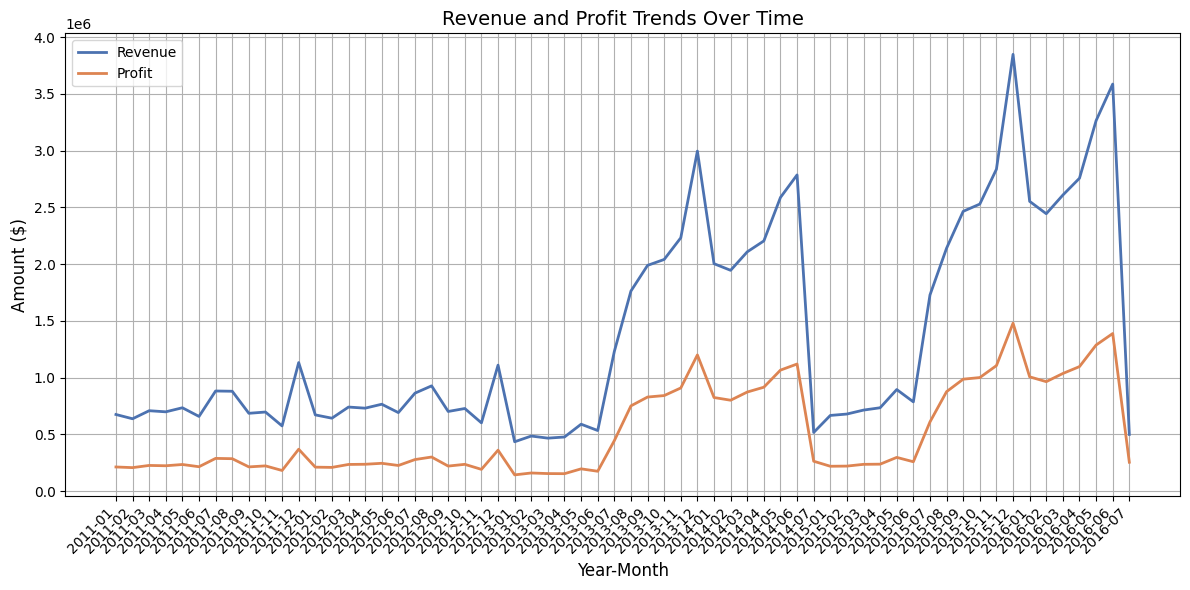

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(time_trend['YearMonth'], time_trend['Revenue'], label='Revenue', linewidth=2)
plt.plot(time_trend['YearMonth'], time_trend['Profit'], label='Profit', linewidth=2)
plt.title('Revenue and Profit Trends Over Time', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/revenue_profit_trend.png')
plt.show()
plt.close()

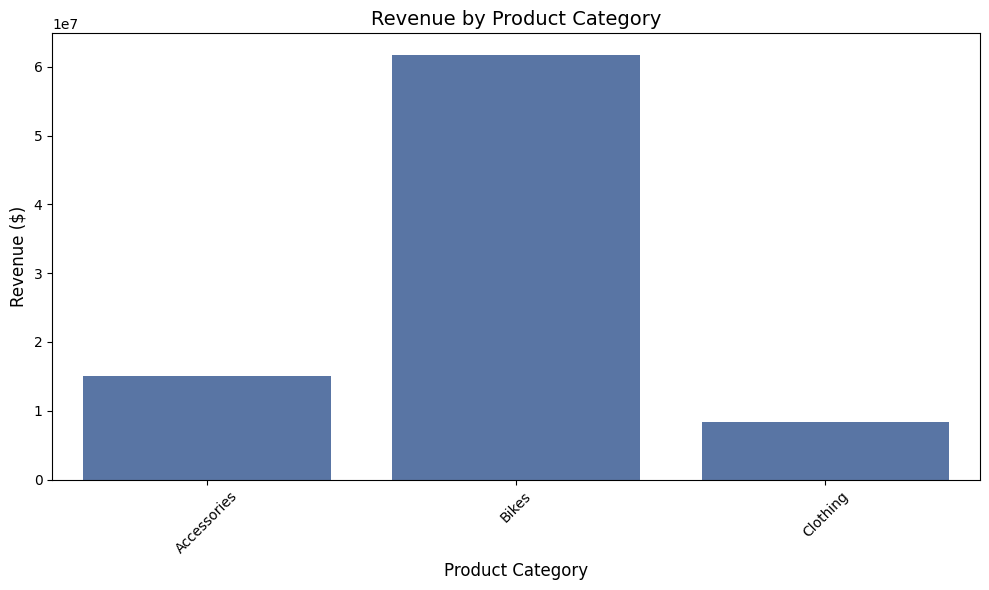

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Revenue', data=category_summary)
plt.title('Revenue by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/revenue_by_category.png')
plt.show()
plt.close()

In [36]:
# Make sure 'Country' column exists in df and is spelled correctly
if 'Country' not in df.columns:
    print("Error: 'Country' column not found in the main DataFrame 'df'.")
    # Exit or handle the error appropriately

In [37]:
country_summary = df.groupby('Country').agg({
    'Order_Quantity': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

In [38]:
print("Columns in country_summary:", country_summary.columns)


Columns in country_summary: Index(['Country', 'Order_Quantity', 'Revenue', 'Profit'], dtype='object')


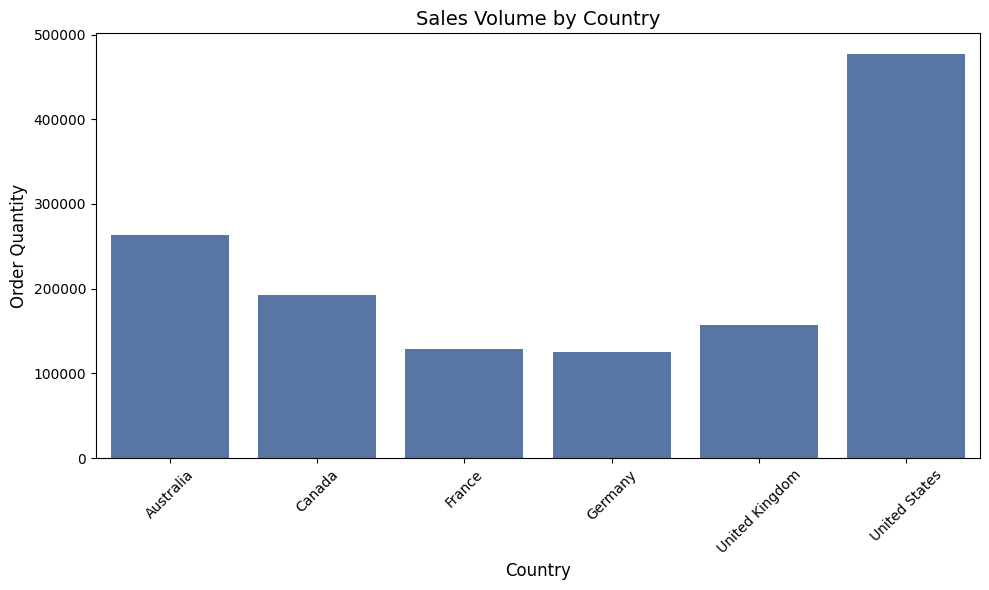

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Order_Quantity', data=country_summary)
plt.title('Sales Volume by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Order Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/sales_by_country.png')
plt.show()
plt.close()

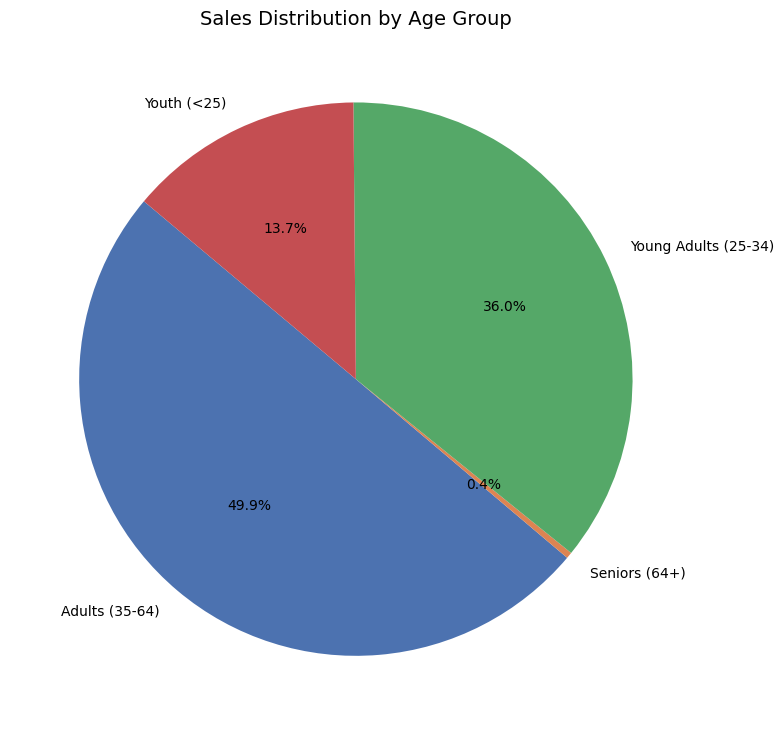

In [41]:
age_group_sales = df.groupby('Age_Group')['Revenue'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(age_group_sales['Revenue'], labels=age_group_sales['Age_Group'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Age Group', fontsize=14)
plt.tight_layout()
plt.savefig('plots/sales_by_age_group.png')
plt.show()
plt.close()

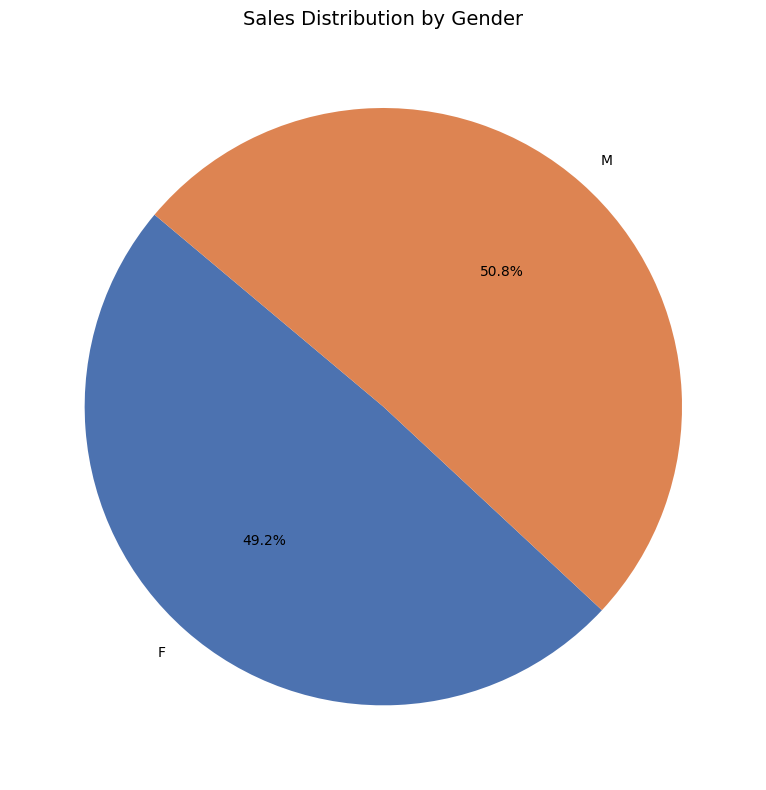

In [43]:
gender_sales = df.groupby('Customer_Gender')['Revenue'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(gender_sales['Revenue'], labels=gender_sales['Customer_Gender'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Gender', fontsize=14)
plt.tight_layout()
plt.savefig('plots/sales_by_gender.png')
plt.show()
plt.close()

In [44]:
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Revenue:")
print(top_products)


Top 5 Products by Revenue:
Product
Road-150 Red, 62           3829416
Mountain-200 Black, 38     3366248
Road-150 Red, 52           3180840
Road-150 Red, 56           3158805
Mountain-200 Silver, 42    3081078
Name: Revenue, dtype: int64


In [45]:
monthly_sales = df.groupby('Month')['Revenue'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
print("\nMonthly Sales Trends:")
print(monthly_sales)


Monthly Sales Trends:
Month
January      7005895
February     6834583
March        7347164
April        7602750
May          8836763
June         9043008
July         5721459
August       5711193
September    5841885
October      5995079
November     6244298
December     9086931
Name: Revenue, dtype: int64


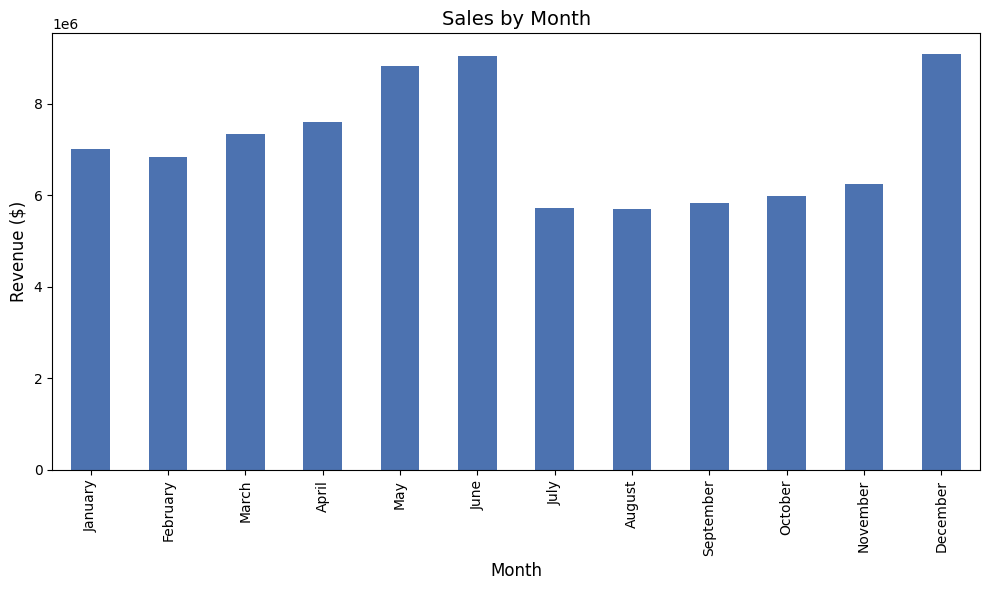

In [47]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Sales by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.tight_layout()
plt.savefig('plots/sales_by_month.png')
plt.show()
plt.close()

In [48]:
print("\nKey Observations:")
print("- The dataset shows consistent sales across multiple years, with Accessories and Clothing as key product categories.")
print("- The United States and Australia are the top markets by sales volume.")
print("- Young Adults (25-34) and Adults (35-64) drive the majority of revenue.")
print("- Seasonal peaks are observed in certain months, suggesting promotional opportunities.")
print("- The Hitch Rack - 4-Bike and Classic Vest products are among the top revenue generators.")


Key Observations:
- The dataset shows consistent sales across multiple years, with Accessories and Clothing as key product categories.
- The United States and Australia are the top markets by sales volume.
- Young Adults (25-34) and Adults (35-64) drive the majority of revenue.
- Seasonal peaks are observed in certain months, suggesting promotional opportunities.
- The Hitch Rack - 4-Bike and Classic Vest products are among the top revenue generators.
